In [1]:
import numpy as np
import pandas as pd

- Installing the required libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install kneed

In [4]:
from kneed import KneeLocator

In [5]:
# Setting for full table display
pd.set_option('display.max_columns', None)

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
# Reading a Source File
data = pd.read_excel("marketing_campaign.xlsx")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [8]:
# shape of the data
data.shape

(2240, 29)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
## find the duplicated values
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Data Imputation

In [11]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**From the above output, we can conclude and note that:**

* There are missing values in income
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

First of all, for the missing values, I am simply going to fill with the mean values.

## Change the datatype

In [12]:
# Check the data type of the "Income" column
data["Income"].dtype

dtype('float64')

In [13]:
# Convert non-numeric values to NaN
data["Income"] = pd.to_numeric(data["Income"], errors="coerce")

# Calculate the mean again
income_mean = data["Income"].mean()

In [14]:
# Fill null values with the mean
null_values = data["Income"].isnull()
data.loc[null_values, "Income"] = income_mean

In [15]:
# Check the data type of the "Income" column after conversion
data["Income"].dtype

dtype('float64')

In [16]:
# Check the number of missing values in the "Income" column
data["Income"].isnull().sum()

0

In [17]:
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [18]:
# Rename columns for convenience
data.rename(columns={'MntWines': 'Wines',
                     'MntFruits': 'Fruits',
                     'MntMeatProducts': 'Meat',
                     'MntFishProducts': 'Fish',
                     'MntSweetProducts': 'Sweet',
                     'MntGoldProds': 'Gold',
                     'NumDealsPurchases': 'Discount_Purchases',
                     'NumWebPurchases': 'Web_Purchases',
                     'NumCatalogPurchases': 'Catalog_Purchases',
                     'NumStorePurchases': 'Store_Purchases'}, inplace=True)

In [19]:
# number of accepted offers for all campaigns
data['Total_Accepted'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + \
                         data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [20]:
data['Day'] = data['Dt_Customer'].apply(lambda x: x.day)
data['Month'] = data['Dt_Customer'].apply(lambda x: x.month)
data['Year'] = data['Dt_Customer'].apply(lambda x: x.year)



In [21]:
# amount the customer spent on all product categories in the last 2 years
data['Total_Products'] = data['Wines'] + data['Fruits'] + data['Meat'] + \
                         data['Fish'] + data['Sweet'] + data['Gold']

In [22]:
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

In [23]:
data[pd.isna(data['Income'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Accepted,Day,Month,Year,Total_Products


In [24]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Accepted,Day,Month,Year,Total_Products
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.297768,15.638393,6.467411,2013.028125,605.798214
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,1.000000,1.000000,2012.000000,5.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,8.000000,3.000000,2013.000000,68.750000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,16.000000,6.000000,2013.000000,396.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,23.000000,10.000000,2013.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,4.000000,31.000000,12.000000,2014.000000,2525.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.678381,8.790680,3.486695,0.684554,602.249288


In [25]:
data.duplicated().sum()

0

In [26]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'Discount_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Accepted', 'Day', 'Month', 'Year', 'Total_Products'],
      dtype='object')

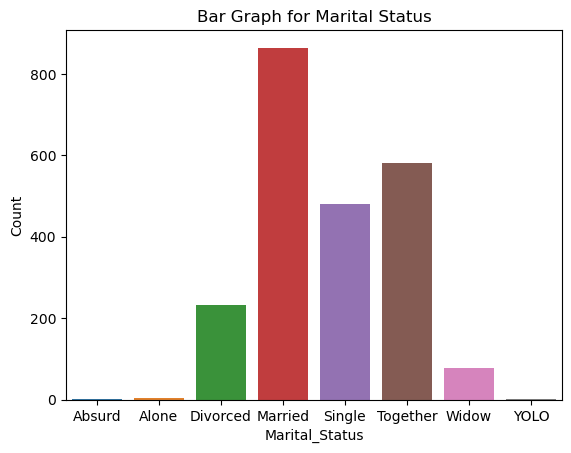

In [27]:
#  draw a bar graph to the marital_status column
sns.barplot(x = "Marital_Status", y = "Count", data = data.groupby("Marital_Status").size().reset_index(name = "Count"))
plt.title("Bar Graph for Marital Status")
plt.show()

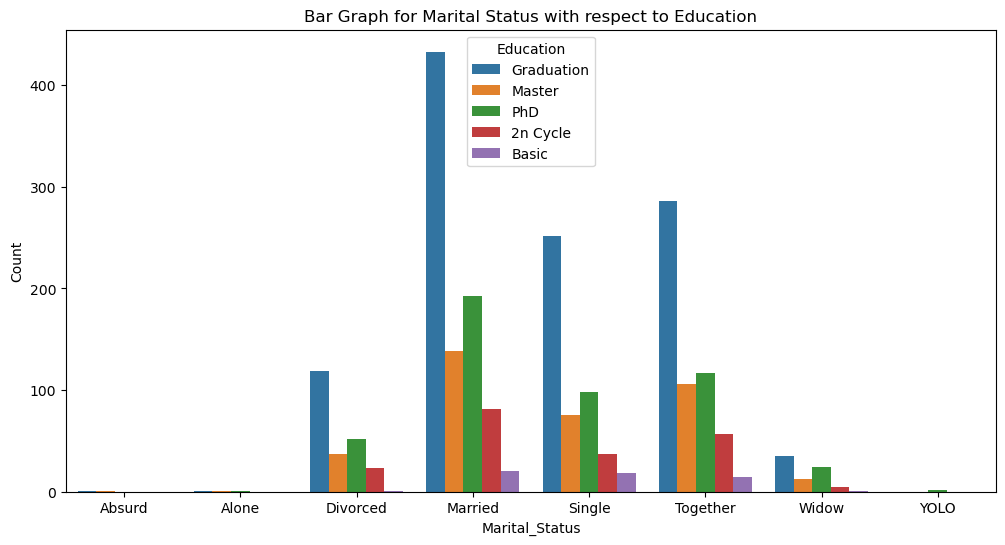

In [28]:
#  draw a bar graph to the marital_status with refrence to the education
plt.figure(figsize=(12,6))
sns.barplot(x = "Marital_Status", y = "Count", hue = "Education", data = data.groupby(["Marital_Status", "Education"]).size().reset_index(name = "Count"))
plt.title("Bar Graph for Marital Status with respect to Education");

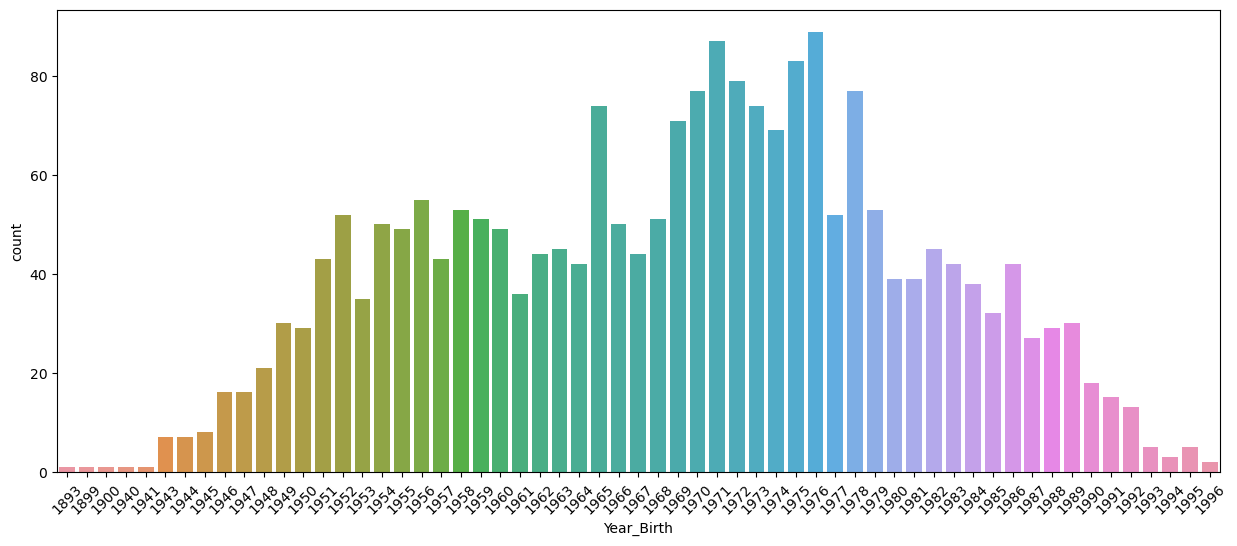

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=data, x='Year_Birth')
plt.xticks(rotation=45)
plt.show()

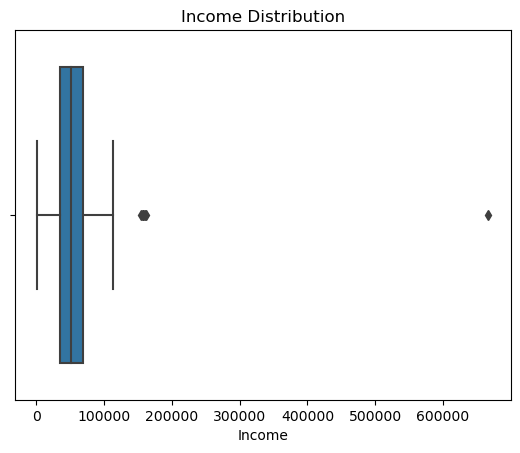

In [30]:
sns.boxplot(x='Income', data=data)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

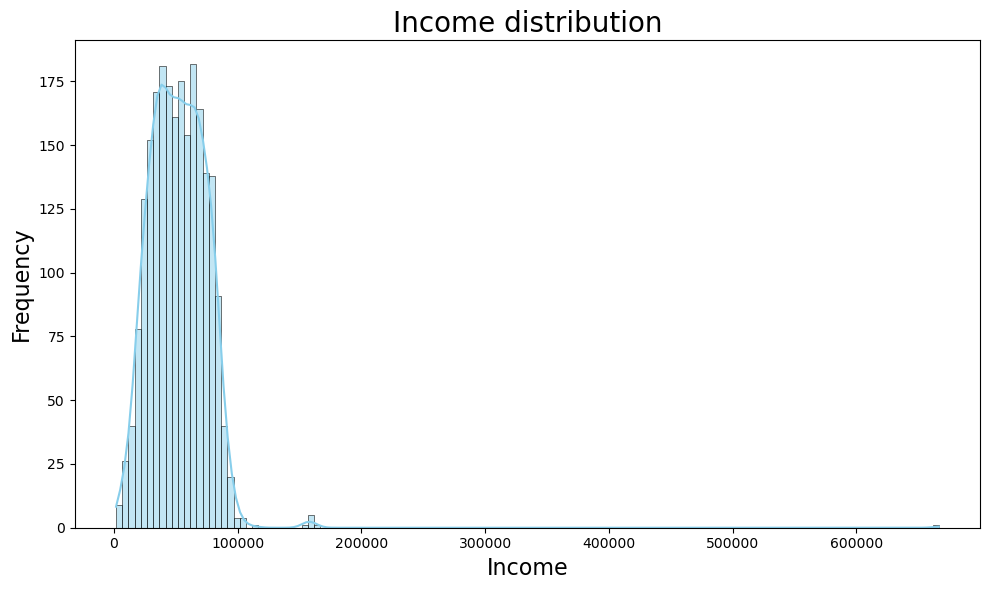

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], kde=True, color="skyblue")
plt.title('Income distribution', fontsize=20)
plt.xlabel('Income', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

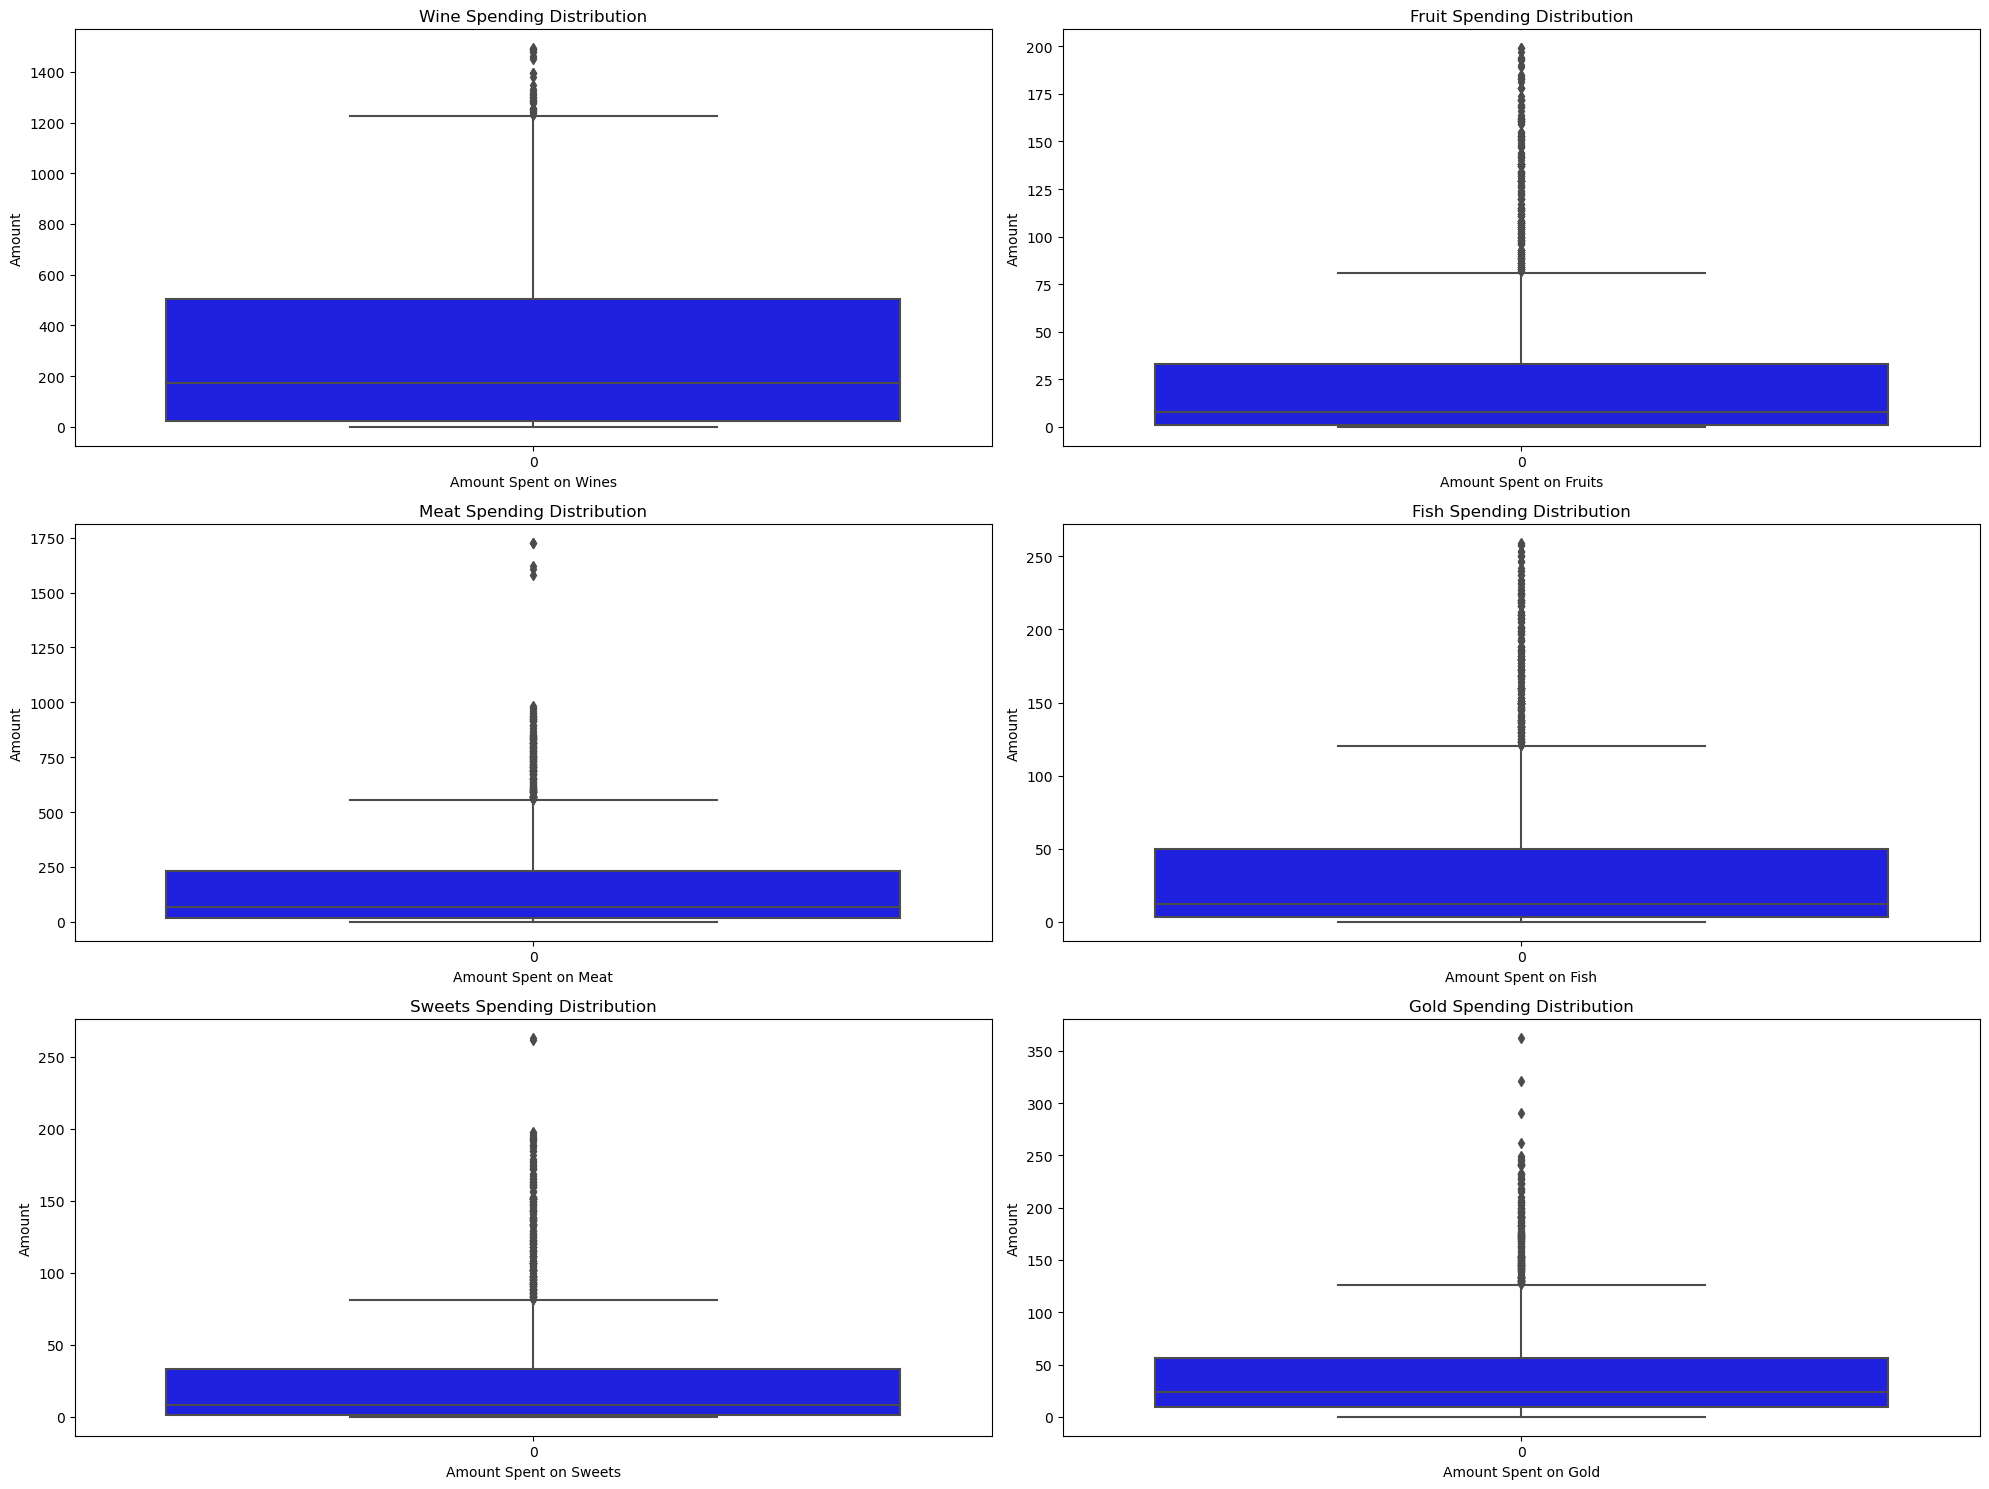

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # 3 rows, 2 columns

# Box plot for amount spent on wines
sns.boxplot(data['Wines'], color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Wine Spending Distribution')
axes[0, 0].set_xlabel('Amount Spent on Wines')
axes[0, 0].set_ylabel('Amount')

# Box plot for amount spent on fruits
sns.boxplot(data['Fruits'], color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Fruit Spending Distribution')
axes[0, 1].set_xlabel('Amount Spent on Fruits')
axes[0, 1].set_ylabel('Amount')

# Box plot for amount spent on meat
sns.boxplot(data['Meat'], color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Meat Spending Distribution')
axes[1, 0].set_xlabel('Amount Spent on Meat')
axes[1, 0].set_ylabel('Amount')

# Box plot for amount spent on fish
sns.boxplot(data['Fish'], color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Fish Spending Distribution')
axes[1, 1].set_xlabel('Amount Spent on Fish')
axes[1, 1].set_ylabel('Amount')

# Box plot for amount spent on sweets
sns.boxplot(data['Sweet'], color='blue', ax=axes[2, 0])
axes[2, 0].set_title('Sweets Spending Distribution')
axes[2, 0].set_xlabel('Amount Spent on Sweets')
axes[2, 0].set_ylabel('Amount')

# Box plot for amount spent on gold
sns.boxplot(data['Gold'], color='blue', ax=axes[2, 1])
axes[2, 1].set_title('Gold Spending Distribution')
axes[2, 1].set_xlabel('Amount Spent on Gold')
axes[2, 1].set_ylabel('Amount')

plt.tight_layout()
plt.show()

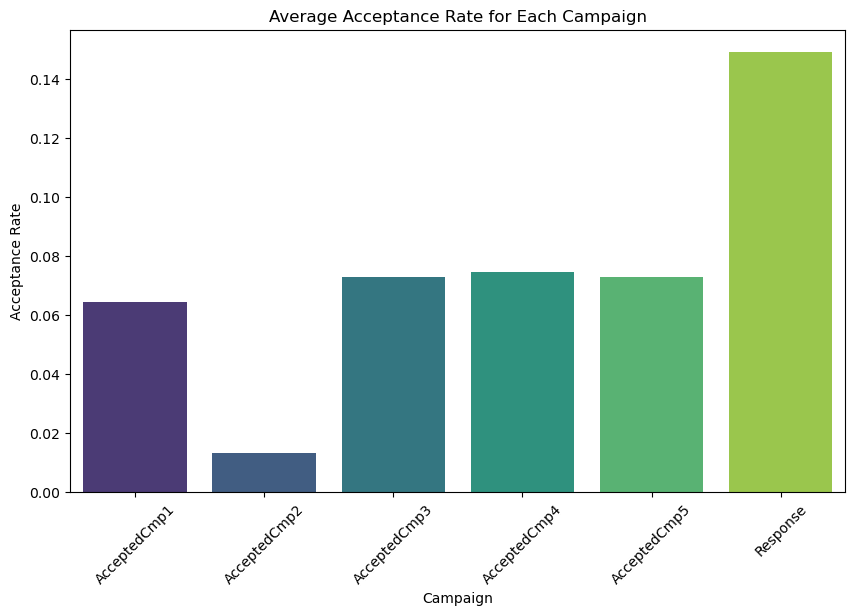

In [33]:
#Average acceptance rate for each campaign
campaign_acceptance_rates = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()

# Visualize the acceptance rates for each campaign
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette='viridis')
plt.title('Average Acceptance Rate for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [34]:
#Age of customer today
data["Age"] = 2024-data["Year_Birth"]

In [35]:
#Total spendings on various items
data["Spent"] = data["Wines"]+ data["Fruits"]+ data["Meat"]+ data["Fish"]+ data["Sweet"]+ data["Gold"]

In [36]:
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [37]:
data.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

In [38]:
data['total_cmp_accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [39]:
data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],axis=1,inplace=True)

In [40]:
data['total_purchases'] = data['Discount_Purchases'] + data['Web_Purchases'] + data['Catalog_Purchases'] + data['Store_Purchases']

In [41]:
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [42]:
#Segmenting education levels in three groups
data['Education'].replace({'Basic':0,'2n Cycle':1,'Graduation':2,'Master':3,'PhD':4},inplace=True)

In [43]:
data['Education'].value_counts()

Education
2    1127
4     486
3     370
1     203
0      54
Name: count, dtype: int64

<Axes: ylabel='count'>

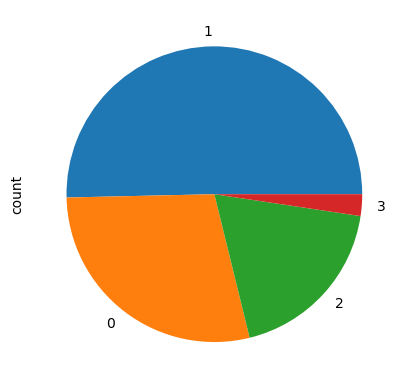

In [44]:
data['Children'].value_counts().plot(kind="pie")

<Axes: xlabel='Children', ylabel='Wines'>

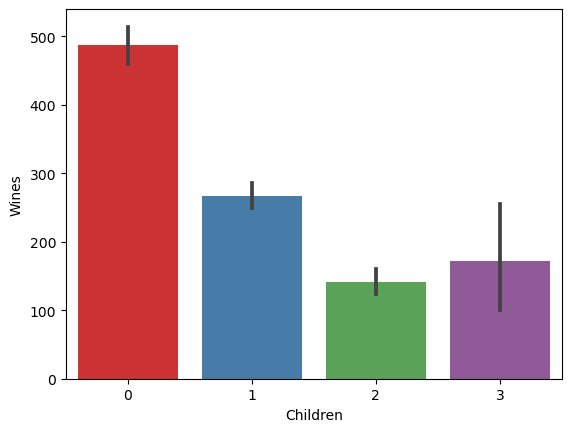

In [45]:
sns.barplot(x='Children', y="Wines",  data=data, palette = 'Set1')

In [46]:
from datetime import datetime

# Convert 'Dt_Customer' column to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Calculate today's date
today = datetime.now()

# Calculate the difference between today and the enrollment date in days
data['Days Enrolled'] = (today - data['Dt_Customer']).dt.days

In [47]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Total_Accepted,Day,Month,Year,Total_Products,Age,Spent,Children,total_cmp_accepted,total_purchases,Is_Parent,Days Enrolled
0,5524,1957,2,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0,4,9,2012,1617,67,1617,0,0,25,0,4242
1,2174,1954,2,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0,8,3,2014,27,70,27,2,0,6,1,3692
2,4141,1965,2,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0,21,8,2013,776,59,776,0,0,21,0,3891
3,6182,1984,2,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0,10,2,2014,53,40,53,1,0,8,1,3718
4,5324,1981,4,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0,19,1,2014,422,43,422,1,0,19,1,3740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,3,11,0,0,13,6,2013,1341,57,1341,1,0,18,1,3960
2236,4001,1946,4,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,3,11,0,1,10,6,2014,444,78,444,3,1,22,1,3598
2237,7270,1981,2,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,3,11,0,1,25,1,2014,1241,43,1241,0,1,19,0,3734
2238,8235,1956,3,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,3,11,0,0,24,1,2014,843,68,843,1,0,23,1,3735


In [48]:
current_year = datetime.now().year
# Calculate age by subtracting birth year from current year
data['Age'] = current_year - data['Year_Birth']

In [49]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Total_Accepted,Day,Month,Year,Total_Products,Age,Spent,Children,total_cmp_accepted,total_purchases,Is_Parent,Days Enrolled
0,5524,1957,2,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0,4,9,2012,1617,67,1617,0,0,25,0,4242
1,2174,1954,2,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0,8,3,2014,27,70,27,2,0,6,1,3692
2,4141,1965,2,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0,21,8,2013,776,59,776,0,0,21,0,3891
3,6182,1984,2,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0,10,2,2014,53,40,53,1,0,8,1,3718
4,5324,1981,4,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0,19,1,2014,422,43,422,1,0,19,1,3740


In [50]:
data.drop(columns = ['Dt_Customer','Year_Birth','ID'], inplace = True)

In [51]:
data.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Total_Accepted,Day,Month,Year,Total_Products,Age,Spent,Children,total_cmp_accepted,total_purchases,Is_Parent,Days Enrolled
0,2,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0,4,9,2012,1617,67,1617,0,0,25,0,4242
1,2,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0,8,3,2014,27,70,27,2,0,6,1,3692
2,2,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0,21,8,2013,776,59,776,0,0,21,0,3891
3,2,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0,10,2,2014,53,40,53,1,0,8,1,3718
4,4,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0,19,1,2014,422,43,422,1,0,19,1,3740


In [52]:
data['Marital_Status'].replace(['Married','Together'],'Together',inplace=True)
data['Marital_Status'].replace(['Single','Alone'],'Single',inplace=True)
data['Marital_Status'].replace(['Divorced','Widow'],'Was_married',inplace=True)

since absurd and yolo types don't go with any one of the above categories, and since they are very small in number, we can drop them

In [53]:
data = data.drop(data[data['Marital_Status'].isin(['Absurd', 'YOLO'])].index)

In [54]:
data1 = pd.get_dummies(data, columns=["Marital_Status"])

In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Education                   2236 non-null   int64  
 1   Income                      2236 non-null   float64
 2   Recency                     2236 non-null   int64  
 3   Wines                       2236 non-null   int64  
 4   Fruits                      2236 non-null   int64  
 5   Meat                        2236 non-null   int64  
 6   Fish                        2236 non-null   int64  
 7   Sweet                       2236 non-null   int64  
 8   Gold                        2236 non-null   int64  
 9   Discount_Purchases          2236 non-null   int64  
 10  Web_Purchases               2236 non-null   int64  
 11  Catalog_Purchases           2236 non-null   int64  
 12  Store_Purchases             2236 non-null   int64  
 13  NumWebVisitsMonth           2236 non-n

In [56]:
data1.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Total_Accepted,Day,Month,Year,Total_Products,Age,Spent,Children,total_cmp_accepted,total_purchases,Is_Parent,Days Enrolled,Marital_Status_Single,Marital_Status_Together,Marital_Status_Was_married
0,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0,4,9,2012,1617,67,1617,0,0,25,0,4242,True,False,False
1,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0,8,3,2014,27,70,27,2,0,6,1,3692,True,False,False
2,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0,21,8,2013,776,59,776,0,0,21,0,3891,False,True,False
3,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0,10,2,2014,53,40,53,1,0,8,1,3718,False,True,False
4,4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0,19,1,2014,422,43,422,1,0,19,1,3740,False,True,False


In [57]:
data1.drop(columns = ['Response', 'Days Enrolled', 'Age', 'Complain'], axis = 1, inplace = True)

In [58]:
data1[['Z_CostContact', 'Z_Revenue']].describe()

,Z_CostContact,Z_Revenue
count,2236.0,2236.0
mean,3.0,11.0
std,0.0,0.0
min,3.0,11.0
25%,3.0,11.0
50%,3.0,11.0
75%,3.0,11.0
max,3.0,11.0


In [59]:
data1.drop(columns=['Z_CostContact', 'Z_Revenue','Day','Month','Year','Marital_Status_Single','Marital_Status_Together','Marital_Status_Was_married','Spent','Children','total_cmp_accepted','Is_Parent','Web_Purchases','Total_Products','total_purchases'], inplace=True)

## Transforming raw data into standarized format, so that all features would be on a similar scale

In [60]:
data1.describe()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Total_Accepted
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,2.458855,52232.669066,49.147138,303.873435,26.271020,166.924419,37.405188,27.081395,43.880590,2.322898,2.659213,5.789356,5.317531,0.297406
std,1.004067,25051.855737,28.954880,336.876776,39.761356,225.778550,54.436749,41.300943,51.979634,1.932052,2.920752,3.253756,2.424756,0.677944
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,35502.500000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,0.000000,3.000000,3.000000,0.000000
50%,2.000000,51741.500000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,2.000000,5.000000,6.000000,0.000000
75%,3.000000,68289.750000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,4.000000,8.000000,7.000000,0.000000
max,4.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,28.000000,13.000000,20.000000,4.000000


In [61]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data1.to_numpy())
scaled_df = pd.DataFrame(scaled, columns= data1.columns)

In [62]:
scaled_df.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Total_Accepted
0,-0.457099,0.235777,0.305815,0.983151,1.552834,1.679346,2.473052,1.475323,0.848972,0.350536,2.513883,-0.550059,0.694027,-0.438786
1,-0.457099,-0.235112,-0.385069,-0.869573,-0.635710,-0.712913,-0.650537,-0.631638,-0.728921,-0.167164,-0.568204,-1.164870,-0.130983,-0.438786
2,-0.457099,0.773782,-0.799600,0.362607,0.571763,-0.176870,1.352235,-0.147279,-0.036187,-0.684864,-0.225750,1.294377,-0.543488,-0.438786
3,-0.457099,-1.021577,-0.799600,-0.869573,-0.560242,-0.650891,-0.503544,-0.583202,-0.748164,-0.167164,-0.910659,-0.550059,0.281522,-0.438786
4,1.535246,0.241966,1.549407,-0.388577,0.420829,-0.216741,0.157922,-0.001971,-0.555738,1.385936,0.116704,0.064753,-0.130983,-0.438786


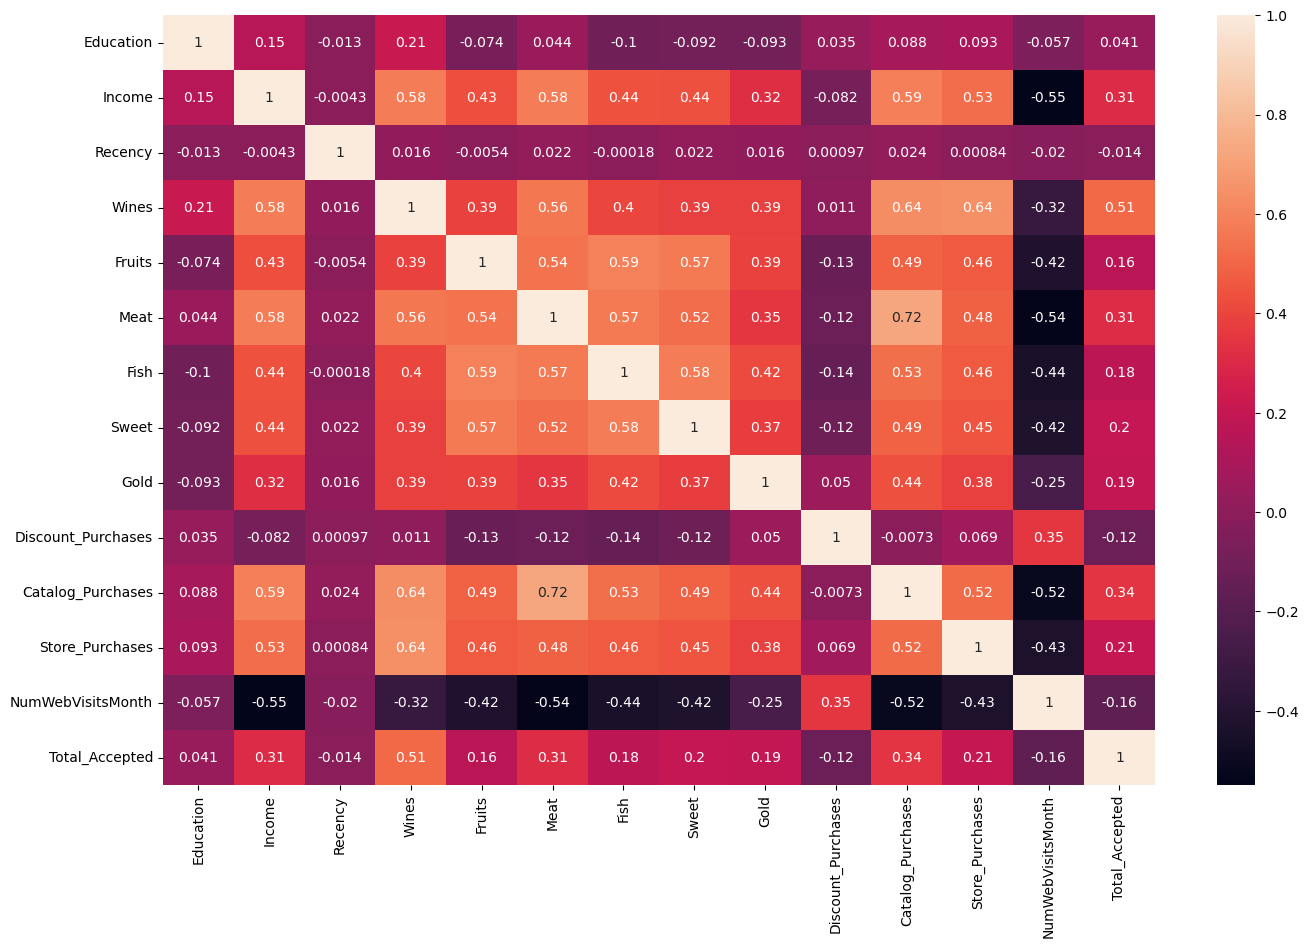

In [63]:
plt.figure(figsize=((16,10)))
sns.heatmap(scaled_df.corr(),annot=True);

## Correlation Analysis

## PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA()
pca_transformed = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(pca_transformed, index=scaled_df.index)
df_pca.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.27,-1.04,1.51,0.23,-0.06,0.22,-1.36,2.05,-0.78,-0.49,0.40,0.95,-0.92,-0.07
1,-1.97,-0.54,-0.58,-0.34,-0.04,0.40,0.51,0.29,0.27,0.23,0.11,-0.06,-0.25,-0.21
2,1.27,-0.75,-0.17,-0.84,-0.61,-0.00,0.26,-1.29,-0.64,-0.00,1.02,0.01,-0.08,0.04
3,-2.17,-0.59,-0.22,-0.79,-0.03,0.21,0.03,-0.17,-0.19,-0.21,-0.12,-0.25,0.11,-0.07
4,-0.10,0.99,0.39,1.66,-1.40,0.20,-0.75,0.34,0.37,0.49,0.32,-0.74,-0.14,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2.10,-0.94,1.71,-0.19,0.60,-2.70,0.67,0.49,1.63,-0.20,-0.79,1.16,-0.05,-1.17
2232,-1.01,2.89,0.72,0.26,-0.07,0.64,-0.46,0.33,0.79,0.57,0.55,-0.70,-0.01,-0.07
2233,1.52,0.89,-0.13,1.29,1.13,0.34,-0.21,-2.13,-1.34,0.00,-0.30,0.25,0.08,0.15
2234,1.67,0.27,-0.25,-1.30,-1.18,-0.16,0.63,-0.39,-0.27,-0.48,0.27,-0.21,-0.26,0.29


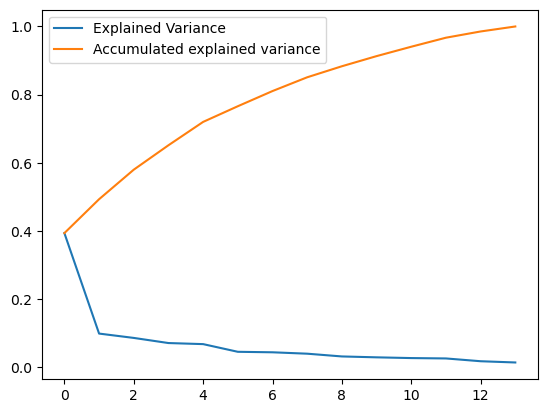

In [66]:
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance,label='Explained Variance')
plt.plot(np.add.accumulate(explained_variance),label='Accumulated explained variance')
plt.legend()

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [68]:
def getKMeans(n_clusters, random_state=100, n_init=20, max_iter=100,tol=0.00001):

    return KMeans(
        n_clusters = n_clusters,
        random_state = random_state,
        n_init = n_init,
        init = 'k-means++',
        max_iter = max_iter,
        tol=tol
    )

In [69]:
def KMeansSihouettePlot(dataframe,max_cluster_size,random_state=100,n_init=20,max_iter=100,tol=0.00001,color=None):

    silhouette_coefficients = []
    for n in range(2, max_cluster_size):
        kmeans = getKMeans(n,random_state,n_init,max_iter,tol)
        cluster_labels = kmeans.fit_predict(dataframe)
        silhouette_coefficients.append(silhouette_score(dataframe,cluster_labels))
        plt.plot(range(2,n+1), silhouette_coefficients,color=color)
        plt.title("Silhouette Coefficient Scores Plot")
        plt.xlabel("Cluster size (n)")
        plt.ylabel("Silhouette Coefficient Score")
        

In [70]:
def sihouetteVisualizer(dataframe, estimator):

    model = SilhouetteVisualizer(estimator)
    model.fit(dataframe)
    model.finalize()

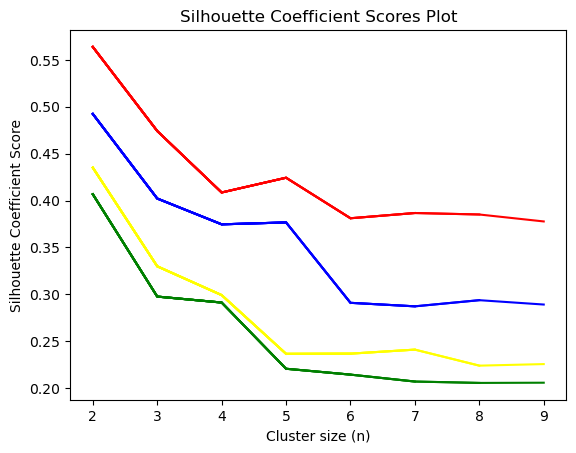

In [71]:
colors = ['red','blue','yellow','green']
for n in range(2,6):
    X = df_pca.iloc[:,:n]
    KMeansSihouettePlot(X, 10,color=colors[n-2])

In [72]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,3.271241,-1.040729
1,-1.966519,-0.540194
2,1.266181,-0.746634
3,-2.169152,-0.586504
4,-0.096191,0.991663
...,...,...
2231,2.103289,-0.941614
2232,-1.013212,2.889180
2233,1.516737,0.891555
2234,1.667465,0.266369


## Kmeans on PCA

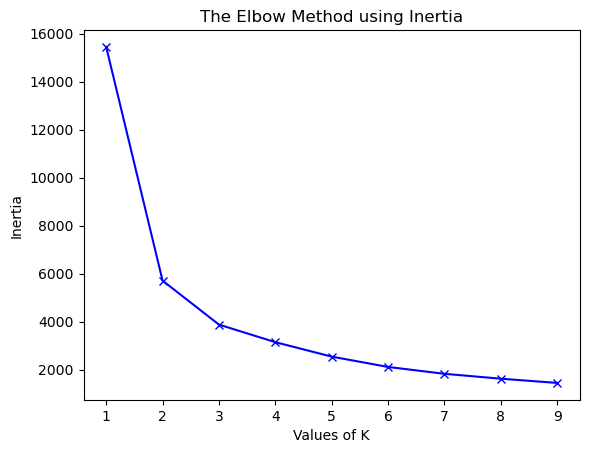

In [73]:
from sklearn.cluster import KMeans

inertia = []
range_val = range(1,10)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(pca_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [74]:
from kneed import KneeLocator

kl = KneeLocator(range(1,10),inertia,curve="convex",direction="decreasing")

kl.elbow

3

In [75]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(pca_df)

preds = model.predict(pca_df)

customer_kmeans = pca_df.copy()
customer_kmeans['clusters'] = preds

In [76]:
pca_df['Cluster'] = preds
pca_df

,PCA1,PCA2,Cluster
0,3.271241,-1.040729,2
1,-1.966519,-0.540194,1
2,1.266181,-0.746634,2
3,-2.169152,-0.586504,1
4,-0.096191,0.991663,0
...,...,...,...
2231,2.103289,-0.941614,2
2232,-1.013212,2.889180,0
2233,1.516737,0.891555,0
2234,1.667465,0.266369,0


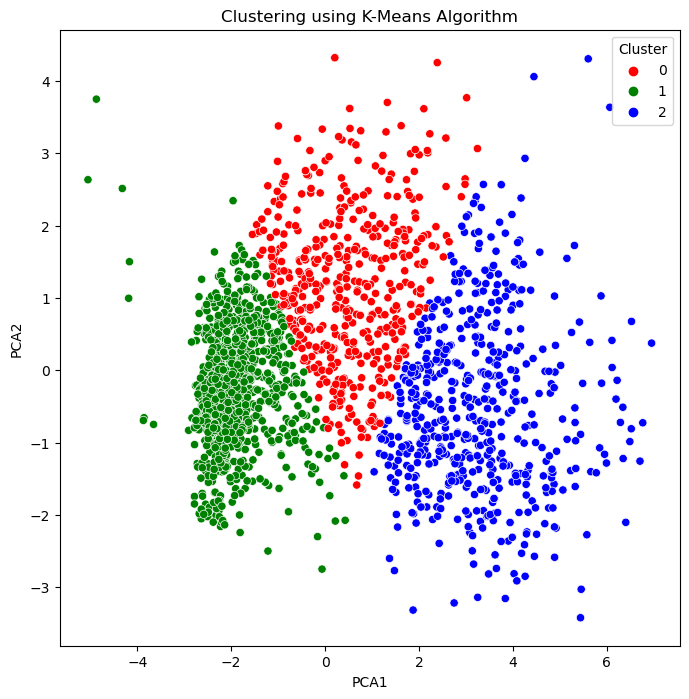

In [77]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=pca_df,palette=['red','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [78]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

print(silhouette_score(pca_df,preds))
print(calinski_harabasz_score(pca_df,preds))
print(davies_bouldin_score(pca_df,preds))

0.5334001422152906
3642.8830783973053
0.7361684579330285


## Agglomerative Clustering

In [79]:
pca_df = pca_df.drop(columns = {'Cluster'})

In [80]:
pca_df

,PCA1,PCA2
0,3.271241,-1.040729
1,-1.966519,-0.540194
2,1.266181,-0.746634
3,-2.169152,-0.586504
4,-0.096191,0.991663
...,...,...
2231,2.103289,-0.941614
2232,-1.013212,2.889180
2233,1.516737,0.891555
2234,1.667465,0.266369


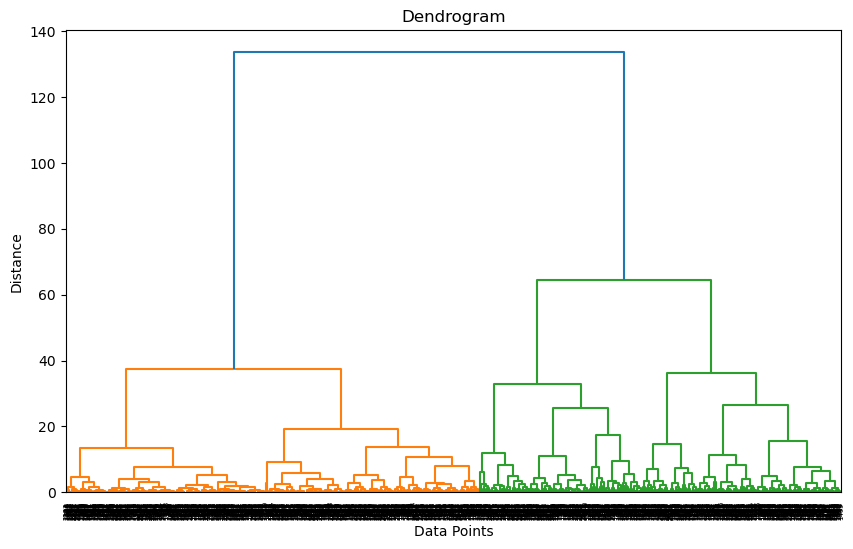

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage

pca_array = np.array(pca_df)
linkage_matrix = linkage(pca_array, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

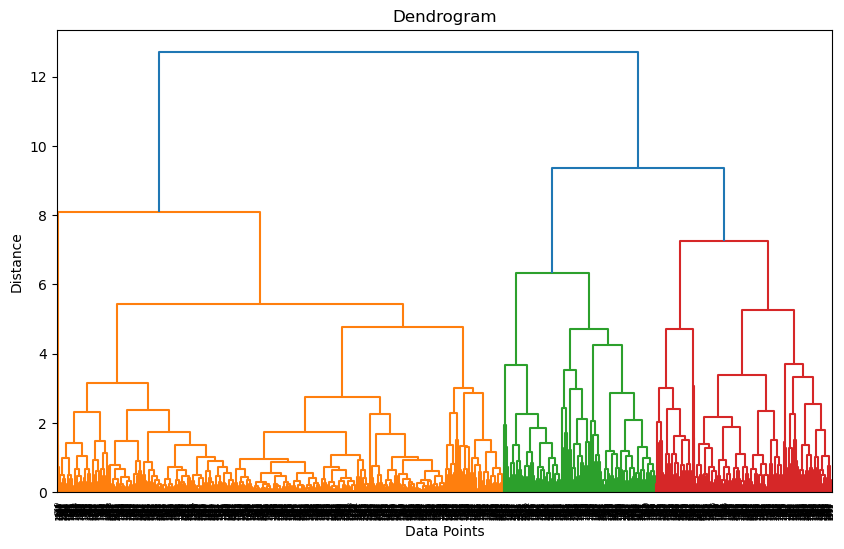

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage

pca_array = np.array(pca_df)
linkage_matrix = linkage(pca_array, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [83]:
pca_df_agglo = pca_df
pca_df_agglo.head()

,PCA1,PCA2
0,3.271241,-1.040729
1,-1.966519,-0.540194
2,1.266181,-0.746634
3,-2.169152,-0.586504
4,-0.096191,0.991663


In [84]:
pca_array_agglo = np.array(pca_df_agglo)

In [85]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(pca_array_agglo)
labels = pd.DataFrame(agg_labels)

In [86]:
pca_df_agglo['ClusterID'] = labels
pca_df_agglo

,PCA1,PCA2,ClusterID
0,3.271241,-1.040729,0
1,-1.966519,-0.540194,1
2,1.266181,-0.746634,0
3,-2.169152,-0.586504,1
4,-0.096191,0.991663,1
...,...,...,...
2231,2.103289,-0.941614,0
2232,-1.013212,2.889180,0
2233,1.516737,0.891555,0
2234,1.667465,0.266369,0


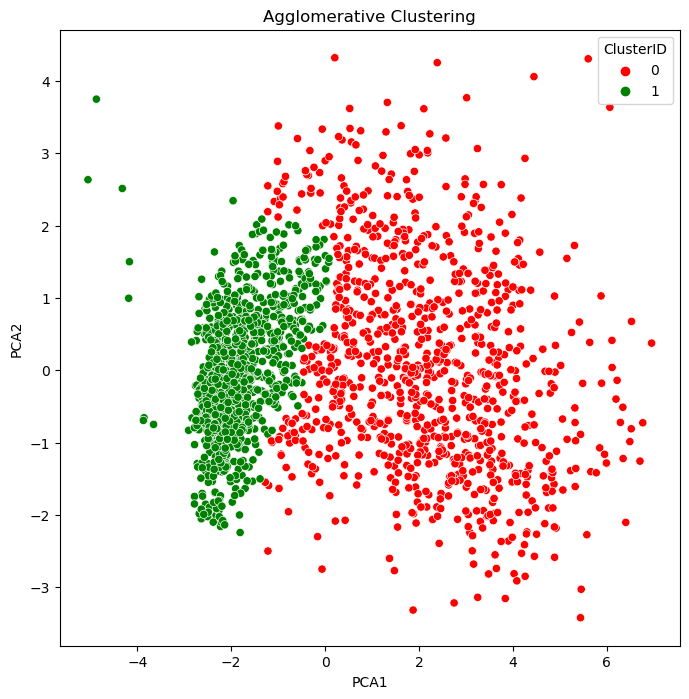

In [87]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="ClusterID",data=pca_df_agglo,palette=['red','green','blue'])
plt.title("Agglomerative Clustering")
plt.show()

In [88]:
print(silhouette_score(pca_df, agg_labels))
print(calinski_harabasz_score(pca_df, agg_labels))
print(davies_bouldin_score(pca_df, agg_labels))

0.5286105475717754
3250.864958856696
0.7083726385952462


In [89]:
pca_df = pca_df.drop(columns = {'ClusterID'})

In [90]:
n_clusters_range = [2, 3]
linkage_methods = ['ward', 'complete', 'average']

#Looping
for n_clusters in n_clusters_range:
    for linkage in linkage_methods:
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,
        linkage=linkage)
        agg_labels = agg_clustering.fit_predict(pca_array_agglo)

        # Calculate silhouette score
        silhouette = silhouette_score(pca_df, agg_labels)

        # Print evaluation scores
        print(f"Number of clusters:{n_clusters},Linkage method:{linkage},Silhouette Score: {silhouette}")

Number of clusters:2,Linkage method:ward,Silhouette Score: 0.5106340813481488
Number of clusters:2,Linkage method:complete,Silhouette Score: 0.5410618956441634
Number of clusters:2,Linkage method:average,Silhouette Score: 0.49417340698184514
Number of clusters:3,Linkage method:ward,Silhouette Score: 0.4330279718039031
Number of clusters:3,Linkage method:complete,Silhouette Score: 0.48863156684798154
Number of clusters:3,Linkage method:average,Silhouette Score: 0.29328032996405984


## DBSCAN

In [91]:
dbscan_df = pca_df
dbscan_df

,PCA1,PCA2
0,3.271241,-1.040729
1,-1.966519,-0.540194
2,1.266181,-0.746634
3,-2.169152,-0.586504
4,-0.096191,0.991663
...,...,...
2231,2.103289,-0.941614
2232,-1.013212,2.889180
2233,1.516737,0.891555
2234,1.667465,0.266369


In [92]:
from sklearn.cluster import DBSCAN

dbscan_1 = DBSCAN(eps=1, min_samples=5)
dbscan_labels_1 = dbscan_1.fit_predict(dbscan_df)

In [93]:
dbscan_df['Clusterid'] = dbscan_labels_1
dbscan_df

,PCA1,PCA2,Clusterid
0,3.271241,-1.040729,0
1,-1.966519,-0.540194,0
2,1.266181,-0.746634,0
3,-2.169152,-0.586504,0
4,-0.096191,0.991663,0
...,...,...,...
2231,2.103289,-0.941614,0
2232,-1.013212,2.889180,0
2233,1.516737,0.891555,0
2234,1.667465,0.266369,0


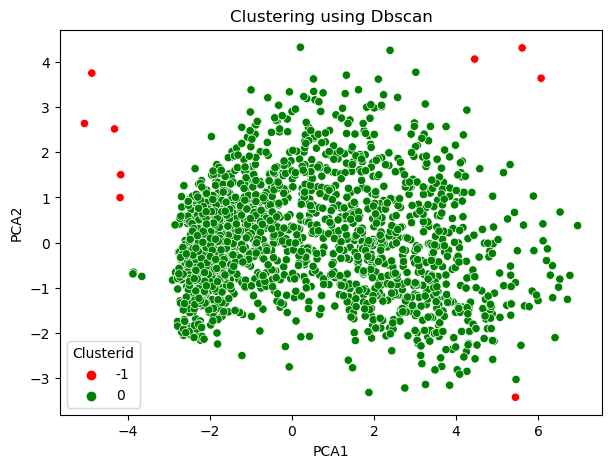

In [94]:
plt.figure(figsize=(7,5))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Clusterid",data=dbscan_df,palette=['red','green','blue', 'yellow','orange','grey'])
plt.title("Clustering using Dbscan")
plt.show()

In [95]:
dbscan_df = dbscan_df.drop(columns = {'Clusterid'})
dbscan_df

,PCA1,PCA2
0,3.271241,-1.040729
1,-1.966519,-0.540194
2,1.266181,-0.746634
3,-2.169152,-0.586504
4,-0.096191,0.991663
...,...,...
2231,2.103289,-0.941614
2232,-1.013212,2.889180
2233,1.516737,0.891555
2234,1.667465,0.266369


In [96]:
for eps in [0.1, 0.5, 1.0]:
    for min_samples in [5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels3 = dbscan.fit_predict(dbscan_df)
        # Evaluate clustering using silhouette score
        silhouette_avg = silhouette_score(dbscan_df, cluster_labels3)
        print(f"For eps={eps} and min_samples={min_samples}, silhouette score: {silhouette_avg}")

For eps=0.1 and min_samples=5, silhouette score: -0.36579696667795253
For eps=0.1 and min_samples=10, silhouette score: -0.33476823608834716
For eps=0.5 and min_samples=5, silhouette score: 0.4050623279508121
For eps=0.5 and min_samples=10, silhouette score: 0.4016366959031619
For eps=1.0 and min_samples=5, silhouette score: 0.480552615585485
For eps=1.0 and min_samples=10, silhouette score: 0.480552615585485


## Models

In [97]:
scaled_df

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Total_Accepted
0,-0.457099,0.235777,0.305815,0.983151,1.552834,1.679346,2.473052,1.475323,0.848972,0.350536,2.513883,-0.550059,0.694027,-0.438786
1,-0.457099,-0.235112,-0.385069,-0.869573,-0.635710,-0.712913,-0.650537,-0.631638,-0.728921,-0.167164,-0.568204,-1.164870,-0.130983,-0.438786
2,-0.457099,0.773782,-0.799600,0.362607,0.571763,-0.176870,1.352235,-0.147279,-0.036187,-0.684864,-0.225750,1.294377,-0.543488,-0.438786
3,-0.457099,-1.021577,-0.799600,-0.869573,-0.560242,-0.650891,-0.503544,-0.583202,-0.748164,-0.167164,-0.910659,-0.550059,0.281522,-0.438786
4,1.535246,0.241966,1.549407,-0.388577,0.420829,-0.216741,0.157922,-0.001971,-0.555738,1.385936,0.116704,0.064753,-0.130983,-0.438786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.457099,0.358949,-0.108715,1.202865,0.420829,0.066786,0.084425,2.201861,3.908547,-0.167164,0.116704,-0.550059,-0.130983,-0.438786
2232,1.535246,0.470383,0.236727,0.303225,-0.660865,-0.606590,-0.687285,-0.655856,-0.690436,2.421336,-0.225750,-0.242653,0.694027,1.036591
2233,-0.457099,0.189582,1.445774,1.793717,0.546607,0.221840,-0.099315,-0.365240,-0.382554,-0.684864,0.116704,2.216594,0.281522,1.036591
2234,0.539074,0.679237,-1.421396,0.368545,0.093805,0.208550,0.782639,0.070683,0.329422,-0.167164,0.801612,1.294377,-0.955993,-0.438786


In [98]:
scaled_df['Cluster'] = preds
scaled_df.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Total_Accepted,Cluster
0,-0.457099,0.235777,0.305815,0.983151,1.552834,1.679346,2.473052,1.475323,0.848972,0.350536,2.513883,-0.550059,0.694027,-0.438786,2
1,-0.457099,-0.235112,-0.385069,-0.869573,-0.635710,-0.712913,-0.650537,-0.631638,-0.728921,-0.167164,-0.568204,-1.164870,-0.130983,-0.438786,1
2,-0.457099,0.773782,-0.799600,0.362607,0.571763,-0.176870,1.352235,-0.147279,-0.036187,-0.684864,-0.225750,1.294377,-0.543488,-0.438786,2
3,-0.457099,-1.021577,-0.799600,-0.869573,-0.560242,-0.650891,-0.503544,-0.583202,-0.748164,-0.167164,-0.910659,-0.550059,0.281522,-0.438786,1
4,1.535246,0.241966,1.549407,-0.388577,0.420829,-0.216741,0.157922,-0.001971,-0.555738,1.385936,0.116704,0.064753,-0.130983,-0.438786,0


In [99]:
scaled_df.shape

(2236, 15)

In [100]:
x = scaled_df.drop(columns = 'Cluster')
x

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Total_Accepted
0,-0.457099,0.235777,0.305815,0.983151,1.552834,1.679346,2.473052,1.475323,0.848972,0.350536,2.513883,-0.550059,0.694027,-0.438786
1,-0.457099,-0.235112,-0.385069,-0.869573,-0.635710,-0.712913,-0.650537,-0.631638,-0.728921,-0.167164,-0.568204,-1.164870,-0.130983,-0.438786
2,-0.457099,0.773782,-0.799600,0.362607,0.571763,-0.176870,1.352235,-0.147279,-0.036187,-0.684864,-0.225750,1.294377,-0.543488,-0.438786
3,-0.457099,-1.021577,-0.799600,-0.869573,-0.560242,-0.650891,-0.503544,-0.583202,-0.748164,-0.167164,-0.910659,-0.550059,0.281522,-0.438786
4,1.535246,0.241966,1.549407,-0.388577,0.420829,-0.216741,0.157922,-0.001971,-0.555738,1.385936,0.116704,0.064753,-0.130983,-0.438786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.457099,0.358949,-0.108715,1.202865,0.420829,0.066786,0.084425,2.201861,3.908547,-0.167164,0.116704,-0.550059,-0.130983,-0.438786
2232,1.535246,0.470383,0.236727,0.303225,-0.660865,-0.606590,-0.687285,-0.655856,-0.690436,2.421336,-0.225750,-0.242653,0.694027,1.036591
2233,-0.457099,0.189582,1.445774,1.793717,0.546607,0.221840,-0.099315,-0.365240,-0.382554,-0.684864,0.116704,2.216594,0.281522,1.036591
2234,0.539074,0.679237,-1.421396,0.368545,0.093805,0.208550,0.782639,0.070683,0.329422,-0.167164,0.801612,1.294377,-0.955993,-0.438786


In [101]:
y = scaled_df['Cluster']
y

0       2
1       1
2       2
3       1
4       0
       ..
2231    2
2232    0
2233    0
2234    0
2235    1
Name: Cluster, Length: 2236, dtype: int32

## Train and Test Split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

## KNN Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(x_train, y_train)

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
print('accuracy score for knn: ', knn_acc)

accuracy score for knn:  0.9329359165424739


## Grid Search for SVC

In [106]:
from sklearn.svm import SVC
param_grid = {
    'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
    'gamma': [0.5, 0.1, 0.01, 0.001],
    'C': [10, 1, 0.1, 0.01]
}

svm_clf = SVC()

grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=10)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy of the best model:", test_accuracy)

{'C': 10, 'gamma': 0.5, 'kernel': 'linear'}
Test accuracy of the best model: 0.992548435171386


In [114]:
x_train

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchases,Catalog_Purchases,Store_Purchases,NumWebVisitsMonth,Total_Accepted
785,-2.449444,-1.269957,-1.525028,-0.890357,-0.358997,-0.717343,-0.632163,-0.268369,-0.517253,-0.167164,-0.910659,-0.857464,0.694027,-0.438786
1285,-0.457099,-0.728519,-0.212348,-0.854727,-0.610554,-0.659751,-0.650537,-0.631638,-0.748164,-0.684864,-0.910659,-0.857464,0.694027,-0.438786
1930,1.535246,0.386658,1.169421,-0.765654,-0.560242,-0.580010,-0.650537,-0.607420,-0.825134,-0.684864,-0.910659,-0.550059,-0.130983,-0.438786
675,-0.457099,-1.017384,-0.799600,-0.899264,-0.635710,-0.717343,-0.687285,-0.583202,-0.825134,-0.684864,-0.910659,-1.164870,1.106531,-0.438786
965,-0.457099,0.100627,1.307598,-0.317319,2.030792,0.266141,-0.558667,0.773003,1.676405,0.350536,-0.225750,1.601782,-0.543488,-0.438786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0.539074,-0.194826,1.514863,-0.355917,-0.610554,-0.655321,-0.540292,-0.462112,-0.767407,0.350536,-0.225750,0.064753,-0.130983,-0.438786
255,1.535246,-0.851771,-0.488702,-0.830975,-0.660865,-0.704053,-0.687285,-0.655856,-0.825134,-0.167164,-0.910659,-0.857464,0.281522,-0.438786
2191,-0.457099,0.861220,0.409448,1.571034,1.351589,0.868636,0.268166,-0.026189,2.503837,-0.167164,0.801612,0.064753,0.281522,1.036591
318,-0.457099,-0.854406,-0.557790,-0.869573,-0.660865,-0.708483,-0.632163,-0.631638,-0.728921,-0.167164,-0.910659,-0.857464,-0.130983,-0.438786


In [107]:
clf = SVC(kernel='linear',C=10, gamma = 0.5)
clf.fit(x_train , y_train)
y_pred_svc = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_pred_svc) * 100
print("Test data Accuracy =", test_acc)

Test data Accuracy = 99.2548435171386


## Double check for verification

In [108]:
verify=pd.DataFrame({'actual':y_test,'predict':y_pred_svc,'equality':y_test==y_pred_svc})
print(verify.equality.value_counts())
verify

equality
True     666
False      5
Name: count, dtype: int64


,actual,predict,equality
2095,2,2,True
568,1,1,True
59,0,0,True
1119,1,1,True
1519,1,1,True
...,...,...,...
184,1,1,True
1486,2,2,True
818,0,0,True
1699,2,2,True


## Different Models and Scores

In [109]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

models = {
    "RandomForest": RandomForestClassifier(criterion="entropy"),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion="entropy"),
    "NaiveBayes": GaussianNB(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(n_estimators=10, learning_rate=0.1),
    "LogisticRegression": LogisticRegression()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

RandomForest Accuracy: 0.9508196721311475
DecisionTreeClassifier Accuracy: 0.9090909090909091
NaiveBayes Accuracy: 0.9120715350223547
GradientBoosting Accuracy: 0.96274217585693
XGBoost Accuracy: 0.9359165424739195
LogisticRegression Accuracy: 0.9985096870342772


## Logistic Regression

In [110]:
from sklearn.metrics import classification_report

log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

y_pred_log = log_reg_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Accuracy: 0.9985096870342772
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       145
           1       1.00      1.00      1.00       346
           2       0.99      1.00      1.00       180

    accuracy                           1.00       671
   macro avg       1.00      1.00      1.00       671
weighted avg       1.00      1.00      1.00       671



In [111]:
verify_log=pd.DataFrame({'actual':y_test,'predict':y_pred_log,'equality':y_test==y_pred_log})
print(verify_log.equality.value_counts())
verify_log

equality
True     670
False      1
Name: count, dtype: int64


,actual,predict,equality
2095,2,2,True
568,1,1,True
59,0,0,True
1119,1,1,True
1519,1,1,True
...,...,...,...
184,1,1,True
1486,2,2,True
818,0,0,True
1699,2,2,True


In [112]:
import pickle

In [113]:
file = open('Customer_clustering.pkl','wb')
pickle.dump(best_model,file)
file.close()
